# ENPH 213 - Week 8 Lab

In this lab, we will be working on Inverse Discrete Fourier Transforms, Fourier Analysis, and continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab8, where LastName is your last name.  Submit that file to onQ.

For marking Parts 1-3 will be marked together (Weighted out of 10) and Part 4 will be marked out of 5.

# Part 1

Create a function $cDFT(y)$ that calculates the $y_k$ coefficients using the complex form for discrete Fourier transforms $e^{-jk 2\pi i / N}$.  

When generating the data set, first create your x-points in the range from 0 to 6, and use at least 10,000 points.  Then, use the function 

$y(t) = e^{-25*(t-3)^2}$

to evaluate on that range of x-values.  Use this function in your new $cDFT(y)$ to compute the $y_k$ values.  Plot the $|y_k|$ values and print the first 10 values of the $y_k$ array.


In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

0.05907588685068086
0.05843171463606286
0.0565410373530043
0.0535248766239226
0.04957061861698192
0.044912761992923
0.039809979102777664
0.034521598457218666
0.029286441478395802
0.024306312326675655


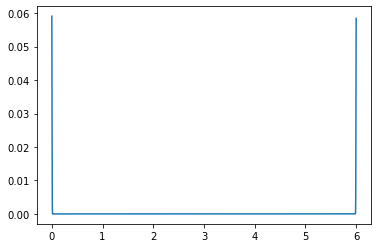

In [295]:
x = np.linspace(0,6,10000) #initialize x array

def y(x): #define function for y
    return np.exp(-25*(x-3)**2)
    
y = y(x) #call function for y on all x points

def cDFT(y): 
    
    yk = np.array(np.zeros(len(y)),dtype = complex) #define array for yk that can take complex numbers
    N = len(yk) #define N as the size of yk or size of y, they are the same
    i = np.linspace(0,N-1,N) #initialize i array to use in for loop because double for loop takes an absurd amount of time 
    
    for k in range(0,N): 
        yk[k] = np.sum(y*(np.exp(-1j*k*2*np.pi*i/N)))  #figuring out yk values 
        
    yk = yk/N #divides every value in the array by N
        
    for k in range(10): #printing off first 10 values
        print(np.abs(yk[k]))
        
    return yk
yk = cDFT(y)
#plt.yscale('log') #did this to be able to see the plot better
plt.plot(x,np.abs(yk))

# Part 2

Create a function $iDFT(yk)$ that calculates the $\tilde y_i$ coefficients using the complex form for inverse discrete Fourier transforms.  

As in Part 1, when generating the data set, first create your x-points in the range from 0 to 6, and use at least 200 points.  Then, use the function 

$y(t) = e^{-25*(t-3)^2} + 0.03 \cos(46 \pi t)$

to evaluate on that range of x-values.  Use this function in your $cDFT(y)$ from Part 1 to compute the $y_k$ values.  Plot the $|y_k|$ values to understand the contribution of the cosine noise term.  

Create a small bit of code to remove the noise from your $y_k$ values that is general enought that if the frequency of the cosine noise is changed slightly, it would still remove the noise.  

Then, apply your new $iDFT(yk)$ Inverse Transform to the filtered data.  Then, plot the real part of the data.

0.05893638605503296
0.05800156740081285
0.05643823440116523
0.053163660133754335
0.0495629588107357
0.04466168263617574
0.03991938367844658
0.03438153164445433
0.02949591429109738
0.024245114997326792


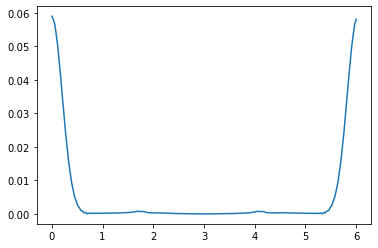

In [317]:
x1 = np.linspace(0,6,200)
def y1(x): # new function and points
    return np.exp(-25*(x-3)**2)+0.03*np.cos(46*np.pi*x)

y1 = y1(x1)
yk1 = cDFT(y1) #calling cDFT function on the new y points

for i in range(len(yk1)): #this is to filter the noise
    if(i > 30): # once we pass i = 30, which is arbitrarily chosen
        if (i < len(yk1)-30): #same thing on the other side so indexing doesnt go past
            avg = (np.sum(np.abs((yk1[i-30:i+30])/61))) #finding the average each time for 30 points across on each side of the point
            if(abs(yk1[i]) > avg*1.2): #if the point i is greater than this average than turn it into the average
                yk1[i] = avg

plt.plot(x1,np.abs(yk1)) #plotting the filtered values

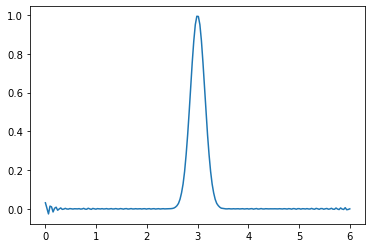

In [312]:
def iDFT(yk):
    N = len(yk)
    yi = np.array(np.zeros(N, dtype = complex)) #make the yi array to handle complex numbers
    i = np.linspace(0,N-1,N) #same as before to reduce time
    for k in range(N-1):
        yi[k] = np.sum(yk*np.exp(1j*k*2*np.pi*i/N))  #take the sum of everything 
    return yi

yi = np.real(iDFT(yk1))

plt.plot(x1,yi)

# Part 3

Download the Lab8-PeriodicData.txt file and load it into the notebook. Apply a windowing function and plot the function with the x-axis as the index points.  Use the built-in Numpy FFT function to transform the dataset.  Then, in the change 3 points in the $y_k$ data to create noticeable noise in the signal (plotting the $y_k$ values should help).  Finally, apply the Numpy iFFT function to recover the altered dataset.  Plot the real and imaginary parts of the altered data.

In [146]:
def trapWindow(x): 
    max = abs(np.max(x)) #find the maximum value in the array to get the top of trapezoid
    trap = np.zeros(len(x)) #make the array for the trapezoid
    for i in range(len(x)):
        if (i <= int(len(x)*0.1)): #when i is less than 10 percent construct both ends of the trapezoid
            trap[i] = max*(i/(len(x)*0.1))
            trap[len(x)-1-i] = max*(i/(len(x)*0.1))
        
        elif(i > int(len(x)*0.1)): #when i is between 10 and 90 percent than the max value is the top
            if(i < int(len(x)*0.9)):
                trap[i] = max
    return trap

#taking the trap window from lab 7 

Text(0.5, 1.0, 'Plot without Noise')

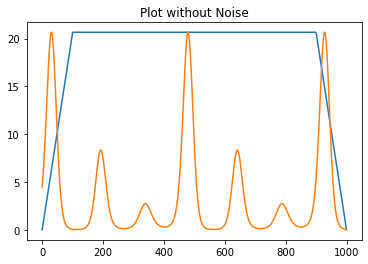

In [148]:
data = np.loadtxt("Lab8-PeriodicData.txt") # taking the data from the file


plt.plot(trapWindow(data)) #using the window function on the dataset
plt.plot(np.abs(data))
plt.title("Plot without Noise")

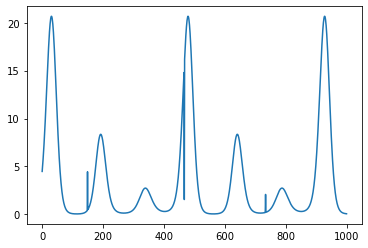

In [124]:
plt.plot(data) #showing the 3 yk values that were changed

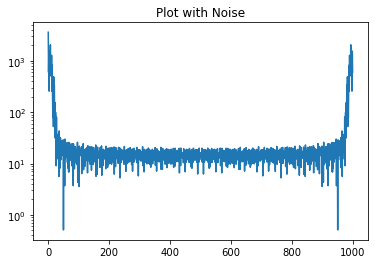

In [130]:
data = np.loadtxt("Lab8-PeriodicData.txt")
yout = np.fft.fft(data) #defining everything again because the dataset was altered


plt.plot(abs(yout))
plt.title("Plot with Noise")
plt.yscale('log') #using this to show noise better

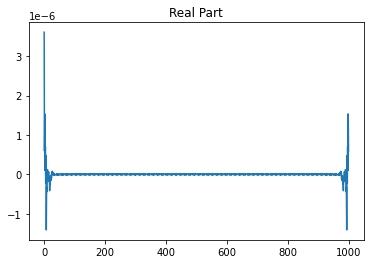

In [139]:
data = np.loadtxt("Lab8-PeriodicData.txt")
yout = np.fft.ifft(yout) #changing the data set back

plt.title("Real Part")
plt.plot(np.real(yout))


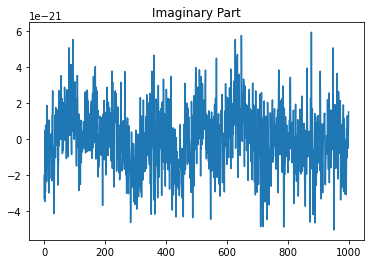

In [138]:
plt.title("Imaginary Part")
plt.plot(np.imag(yout))


# Part 4

Download the Lab8-PeriodicData2.txt file fro onQ and load them into Jupyter.  This dataset is comprise of different regions and different frequencies.  For this part, you will create a moving window to analyse the frequencies in that window.  Consider the x-axis (first column) to be time in seconds.

Choose a windowing function (not the rectangular window) that is 101 points across and will be defined by its centre point.  From the windowed region, apply the Numpy FFT to determine the frequency and magnitude of the oscillatory componenets within the region (ie. position and hieght of the maxima in the FFT).  Note: you will have to determine the actual frequency from the period of the window and the k-value in the transformed data.

Scan the window across all possible times so that you can identify the strength and frequency of each component as a function of time.  Then, make a plot for each frequency that indicates its strength (in your window) as a function of time.

In [216]:
def sineWindow(x):
    max = np.max(x) #same as trapwindow
    sine = np.zeros(len(x))
    
    for i in range(len(x)):
        sine[i] = max*np.sin(i*np.pi/(len(x)-1)) #creating the values for sine
    return sine

#taken from lab 7

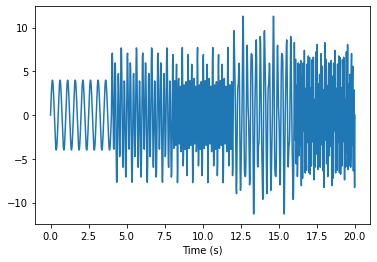

In [320]:
data2 = np.loadtxt("Lab8-PeriodicData2.txt")
t = data2[:,0] #taking first and second columns as t and y
y = data2[:,1]
plt.plot(t,y)
plt.xlabel("Time (s)")
plt.show()

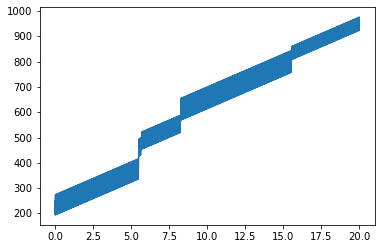

In [420]:
freq = [250] #set the first element of the frequency array to the threshold used later
t = np.linspace(0,20.0,1042) #set the time array to plot against yout
for i in range(len(y)-100):
    ynew = y[i:100+i]
    maxval = max(sineWindow(ynew)) #this is the top of the window function and is the same as the max of ynew
    yout = np.fft.fft(ynew)
    for k in range(100):
        if(abs(yout[k])>250): # goes through the whole window again and finds amplitude values that are much larger than the average
            freq = np.append(freq,i+k) #adds these values to the frequency array
    #print(abs(freq))
    #plt.plot(abs(yout))
    
    #plt.xlabel("Frequency")
    #plt.ylabel("Amplitude")
plt.plot(t,(abs(freq)))

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.